In [94]:
%reload_ext autoreload
%autoreload 2

import random
from importlib import reload
import fidle
import numpy as np
import pandas as pd
from myutils.dataset import  read_dataset,labels_to_class_name
from tensorflow import keras

In [95]:
report_name="./proto-exp-1-scale-out/report_079698.csv"
metadata_name="./proto-exp-1-scale-out/metadata_079698.csv"
report = pd.read_csv(report_name)
metadata = pd.read_csv(metadata_name)

In [96]:
metadata.head()

,enhanced_dir,run_dir,scale,batch_size,epochs,tag_id
0,./data-1-scale,./proto-exp-1-scale-out,1,64,20,79698


In [97]:
report.head(100)

,Dataset,DatasetSize,Model,Datagen,Duration,Accuracy
0,set-24x24-L-LHE,7.341827,model_v1,none,59.205537,68.862277
1,set-24x24-L-LHE,7.341827,model_v1,generator_v1,60.687897,72.155690
2,set-24x24-L-LHE,7.341827,model_v1,generator_v2,1227.575542,72.455090
3,set-24x24-L-LHE,7.341827,model_v2,none,68.514913,70.359284
4,set-24x24-L-LHE,7.341827,model_v2,generator_v1,72.608461,73.652697
5,set-24x24-L-LHE,7.341827,model_v2,generator_v2,76.406427,71.856290
6,set-24x24-L-LHE,7.341827,model_v3,none,88.987368,64.670658
7,set-24x24-L-LHE,7.341827,model_v3,generator_v1,86.990403,68.562877
8,set-24x24-L-LHE,7.341827,model_v3,generator_v2,81.306295,70.359284
9,set-24x24-RGB,21.984406,model_v1,none,57.100912,73.952097


In [98]:
best_combin = report[report["Accuracy"] >= report["Accuracy"].max()]
best_combin

,Dataset,DatasetSize,Model,Datagen,Duration,Accuracy
28,set-48x48-RGB,87.876007,model_v1,generator_v1,161.013065,82.035929


In [99]:
enhanced_dir = metadata.iloc[0]["enhanced_dir"]
dataset_name  = best_combin.iloc[0]["Dataset"]
scale         = metadata["scale"]
dataset_name

'set-48x48-RGB'

In [100]:
x_train,y_train,x_test,y_test,labels = read_dataset(enhanced_dir, dataset_name)
x_train,y_train, x_test,y_test = fidle.utils.rescale_dataset(x_train,y_train,x_test,y_test, scale=scale)

Datasets have been shuffled.
Datasets have been resized with a factor  0    1
Name: scale, dtype: int64


/home/20015587/anaconda3/envs/tf/lib/python3.11/site-packages/fidle/utils.py:198: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  out = [ d[:int(scale*len(d))] for d in data ]
/home/20015587/anaconda3/envs/tf/lib/python3.11/site-packages/fidle/utils.py:198: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  out = [ d[:int(scale*len(d))] for d in data ]
/home/20015587/anaconda3/envs/tf/lib/python3.11/site-packages/fidle/utils.py:198: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  out = [ d[:int(scale*len(d))] for d in data ]
/home/20015587/anaconda3/envs/tf/lib/python3.11/site-packages/fidle/utils.py:198: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. U

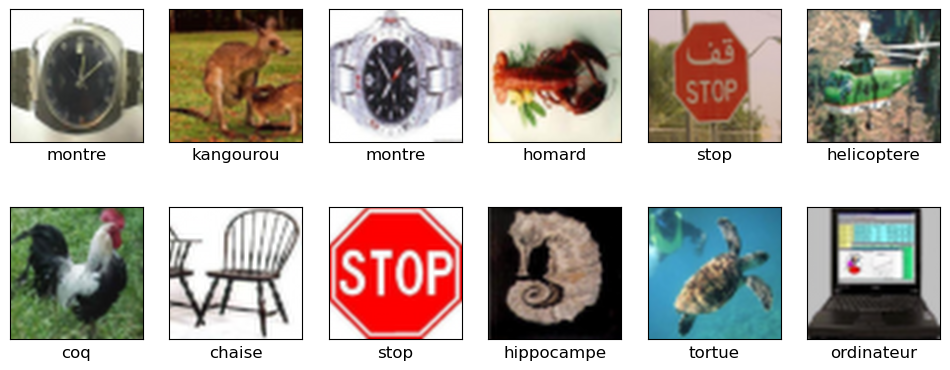

In [101]:


samples = [ random.randint(0,len(x_train)-1) for i in range(12)]
fidle.scrawler.images(x_train,labels_to_class_name(labels,y_train),indices=samples,columns=6,x_size=2, y_size=2,fontsize=12)

### Load model

In [102]:
model = keras.models.load_model("./proto-exp-1-scale-out/models_079698/model_set-48x48-RGB_model_v1_generator_v1.h5")

In [103]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss      : {:5.4f}'.format(score[0]))
print('Test accuracy  : {:5.4f}'.format(score[1]))

Test loss      : 0.6683
Test accuracy  : 0.8024


### Testing

11/11 [==============================] - 0s 23ms/step


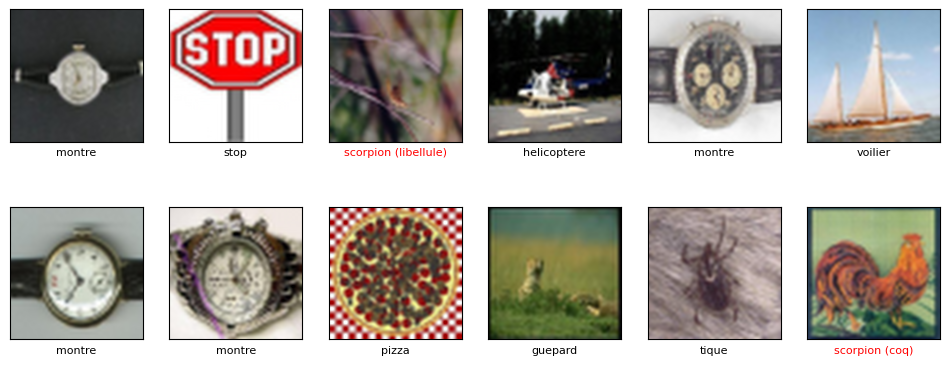

In [104]:

softmax_output = model.predict(x_test)
y_pred = np.argmax(softmax_output,axis=1)

samples = [ random.randint(0,len(x_test)-1) for i in range(12)]
fidle.scrawler.images(x_test,labels_to_class_name(labels,y_test),indices=samples,columns=6,x_size=2, y_size=2,fontsize=8,y_pred=labels_to_class_name(labels,y_pred))

### Matrice de confusion

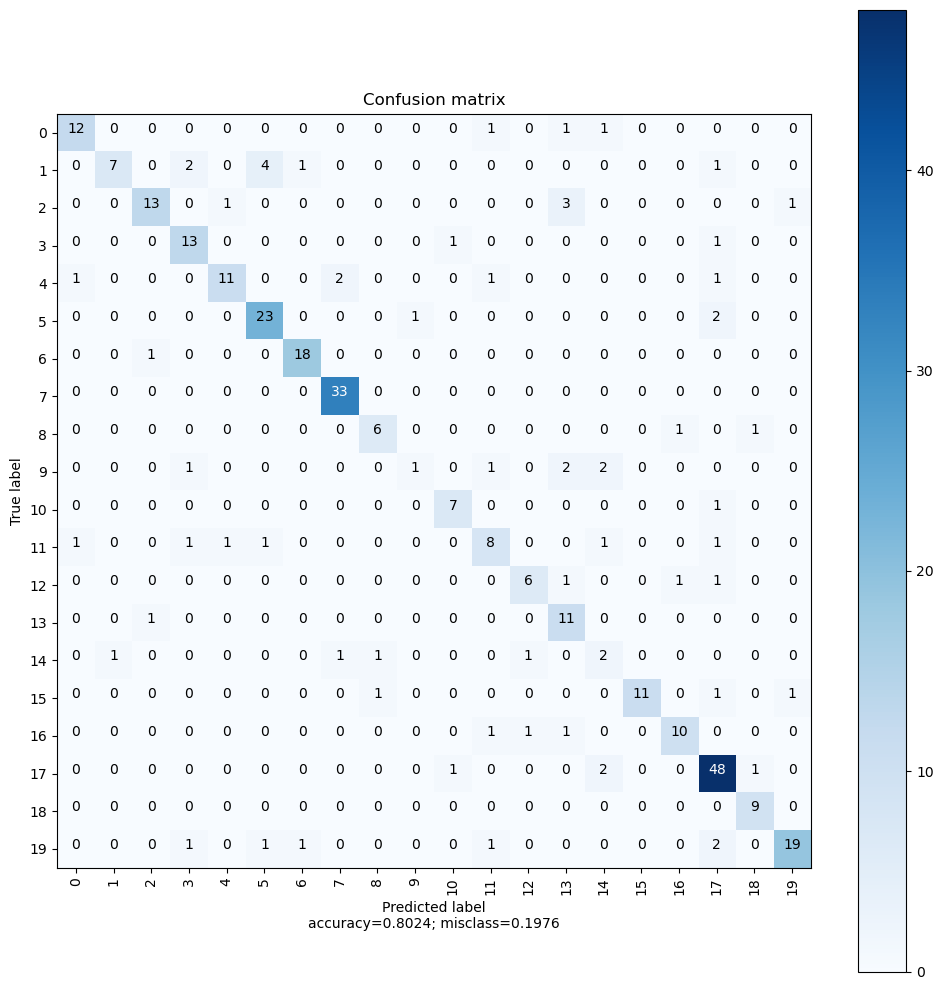

In [105]:
#cmap = plt.get_cmap('Oranges')
fidle.scrawler.confusion_matrix(y_test,y_pred,range(20), figsize=(10, 10),normalize=False,  save_as='confusion-matrix')